In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math

In [2]:
dataset = pd.read_csv('Advertising.csv')

In [3]:
dataset.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
dataset.shape

(200, 4)

In [5]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
dataset.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


<AxesSubplot: >

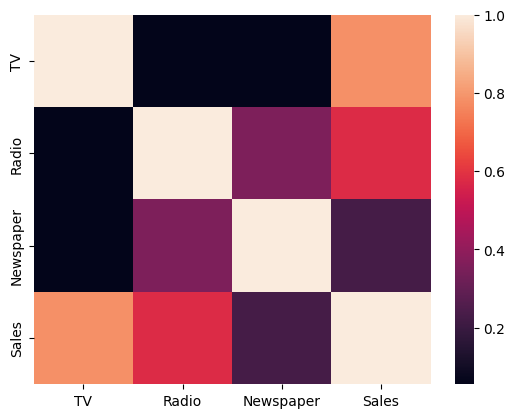

In [8]:
sns.heatmap(dataset.corr())

In [9]:
dataset.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


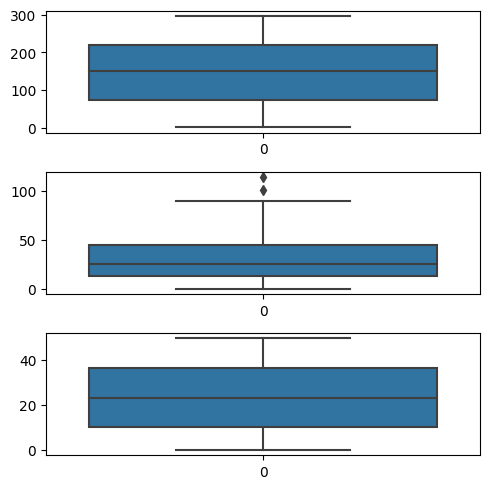

In [10]:
#outlier analysis

fig, axs = plt.subplots(3, figsize= (5,5))
plt1 = sns.boxplot(dataset['TV'], ax = axs[0])
plt2 = sns.boxplot(dataset['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(dataset['Radio'], ax = axs[2])
plt.tight_layout()


There are no considerable outliers present in data

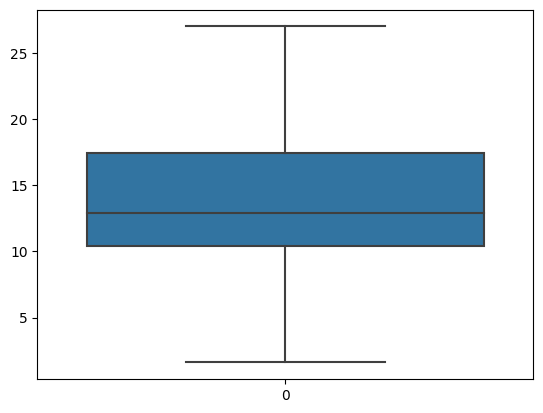

In [11]:
sns.boxplot(dataset['Sales'])
plt.show()

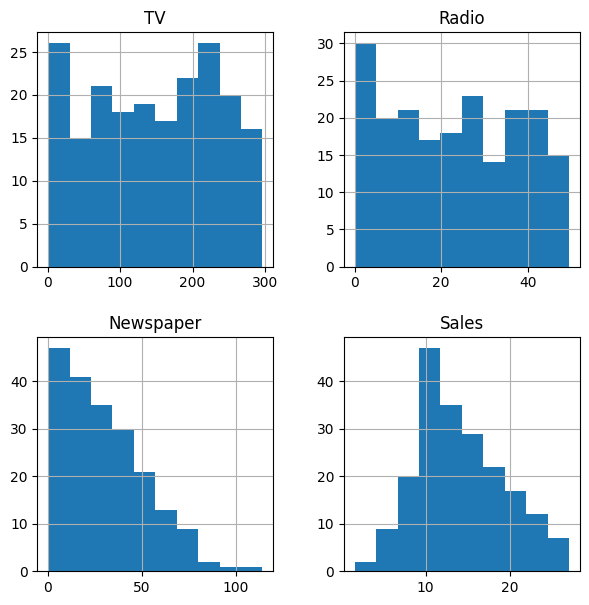

In [12]:
#Histogram

dataset.hist(figsize=(7,7))
plt.show()

There is no outlier present in target Sales


In [13]:
x = dataset.drop(['Sales'] , axis=1)
y = dataset['Sales']

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 2)

In [15]:
regressor = LinearRegression()

In [16]:
regressor.fit(x_train,y_train)

LinearRegression()

In [17]:
test_data_prediction = regressor.predict(x_test)

In [18]:
train_data_prediction = regressor.predict(x_train)

In [19]:
r2_train = metrics.r2_score(y_train, train_data_prediction)
print("R squared value is: ", r2_train)

rf_mse = mean_squared_error(y_train, train_data_prediction)
print('MSE-Linear Regression : %.2f (square-rooted)' % math.sqrt(rf_mse))

R squared value is:  0.9151707412454462
MSE-Linear Regression : 1.57 (square-rooted)


The R squared value is near to one so our model is predicting the good value of sales